In [1]:
from os import listdir
from os.path import join, isdir

import numpy as np
from scipy.io import loadmat
from scipy import signal

import matplotlib.pyplot as plt
import pandas as pd
import mne
import mne_features


path_to_eeg = 'data/filtered_eeg'
path_to_feeltrace = '../../converted_data'
path_to_figures = './figures'


Bad key "text.kerning_factor" on line 4 in
/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
eeg_data = pd.read_csv(join(path_to_eeg, 'p2_eeg.csv'), delimiter=' ', header=None) * (10 ** 6) # turns Volts to microVolts

In [3]:
eeg_data.columns = ['E'+ str(i+1) for i in range(64)]
eeg_data

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E55,E56,E57,E58,E59,E60,E61,E62,E63,E64
0,0.179732,0.065074,0.030289,0.003901,0.057602,0.001899,-0.004928,-0.004454,-0.024681,-0.046489,...,0.067596,0.076107,0.058595,0.110581,0.092793,0.061158,0.115845,1147.051514,-0.112211,-0.103276
1,-6.132051,0.670771,-2.761284,-1.055322,-9.865631,-1.090376,-0.555795,-4.029478,-5.769555,-4.791678,...,-18.779365,39.557926,0.879194,-0.370174,0.257754,-3.169993,-9.031759,1133.590088,-21.687657,-37.337292
2,1.280076,-4.499682,-2.155355,-0.401223,-8.609895,-0.460729,-1.732360,-1.032533,-4.306031,2.089714,...,-17.934496,35.862657,-3.738197,2.354134,-4.216640,-5.557793,1.336699,1148.293945,-9.262737,-16.985092
3,11.820108,-5.516768,3.092208,1.549488,5.643187,3.366087,-1.535483,7.154361,2.796095,12.238207,...,-9.884297,16.474453,-5.556681,5.714160,-3.808140,-1.230510,16.760243,1154.135010,19.259088,23.857678
4,11.740342,0.862238,7.380148,2.651538,19.751407,7.422562,0.369148,11.719790,8.058740,13.527387,...,-13.835699,20.703956,-1.567214,5.584076,2.607691,6.263791,14.826589,1148.333740,27.515822,24.718287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732541,47.057331,40.624234,19.106483,-1.099108,37.444936,16.576743,4.779512,78.446582,4.393306,68.954169,...,-41.176716,47.314139,50.499185,6.924077,8.303565,39.553783,10.274775,0.000000,-12.087234,1.226565
732542,41.793447,36.063837,16.977209,-0.981867,33.182679,14.687559,4.220308,69.640737,3.882470,61.212922,...,-37.045934,42.011881,44.857290,6.176193,7.430800,35.171887,9.107011,0.000000,-10.862250,0.924769
732543,31.280899,26.966775,12.701681,-0.735720,24.786478,10.965431,3.143403,52.048350,2.889046,45.740515,...,-27.890494,31.419431,33.550018,4.651781,5.598820,26.325696,6.823546,0.000000,-8.199597,0.597596
732544,16.797827,14.438322,6.802542,-0.392103,13.262860,5.856531,1.674633,27.809045,1.530386,24.419476,...,-14.933635,16.824214,17.956743,2.539383,3.041026,14.101730,3.696427,0.000000,-4.448769,0.251790


In [4]:
eeg_data = eeg_data.to_numpy()
eeg_data.shape

(732546, 64)

In [5]:
feeltrace_mat = join(path_to_feeltrace, '2', 'feeltrace.mat')
feeltrace = loadmat(feeltrace_mat)
feeltrace = feeltrace['feeltrace']
timestamps = feeltrace[:,0]

In [6]:
p2_feeltrace = feeltrace
new_timestamp = np.arange(p2_feeltrace[0,0], p2_feeltrace[-1,0], 1000)
p2_feeltrace_even = np.interp(new_timestamp, p2_feeltrace[:,0], p2_feeltrace[:,1])
p2_feeltrace_slope = np.diff(p2_feeltrace_even)
np.save('data_label.npy', p2_feeltrace_slope)

In [7]:
p2_feeltrace_slope.shape

(614,)

In [8]:
sfreq = 1000
num_channels = 64

tmin = int(timestamps[0])
tmax = int(timestamps[-1])

eeg = eeg_data[tmin:tmax, :]
num_second = eeg.shape[0] // sfreq
eeg = eeg[:num_second * sfreq, :]
eeg = eeg.reshape((num_second, sfreq, num_channels))

In [9]:
eeg.shape

(614, 1000, 64)

In [10]:
gamma_channels_index = [20, 25, 26, 27, 45]
gamma_channels_names = ["CP1(21)", "CP5(26)", "P5(27)", "P3(28)", "CP6(46)"]

beta_channels_index = [50, 31, 59, 25]
beta_channels_names = ["C2(51)", "P9(32)", "F7(60)", "CP5(26)"]

df_channels_index = [31, 26, 29, 30, 53]
df_channels_names = ["P9(32)", "P5(27)", "P7(30)", "P1(31)", "FC2(54)"]

https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5165369/6933964/6858031/jenke1-2339834-large.gif

In [11]:
def compute_metric(X, metric, axis=None):
    if metric == "mean":
        return np.mean(X, axis=axis)
    elif metric == "min":
        return np.min(X, axis=axis)
    elif metric == "max":
        return np.max(X, axis=axis)
    elif metric == "var":
        return np.var(X, axis=axis)
        
def compute_gamma(X):
#     gamma_channels_index = np.arange(64)
#     gamma_channels_names = ["E" + str(i+1) for i in gamma_channels_index]
    lo, hi = 30, 64
    metrics = ["mean", "min", "max", "var"]
    
    feature_names = []
    values = np.array(())
    X_fft = np.fft.fft(X[:, gamma_channels_index], axis=0)
    freqs = np.fft.fftfreq(sfreq, d=1/sfreq)
    X_gamma_fft = X_fft[np.logical_and(np.abs(freqs) > lo, np.abs(freqs) < hi)]
    
    for m in metrics:
        feature_names += map(lambda name: name + "_gamma_fft_" + m, gamma_channels_names)
        values = np.append(values, np.abs(compute_metric(X_gamma_fft, m, 0))) # append the magnitude of fft band
              
    return feature_names, values

def compute_beta(X):
#     beta_channels_index = np.arange(64)
#     beta_channels_names = ["E" + str(i+1) for i in gamma_channels_index]
    lo, hi = 12, 30
    metrics = ["mean", "min", "max", "var"]
    
    feature_names = []
    values = np.array(())
    X_fft = np.fft.fft(X[:, beta_channels_index], axis=0)
    freqs = np.fft.fftfreq(sfreq, d=1/sfreq)
    X_beta_fft = X_fft[np.logical_and(np.abs(freqs) > lo, np.abs(freqs) < hi)]

    for m in metrics:
        feature_names += map(lambda name: name + "_beta_fft_" + m, beta_channels_names)
        values = np.append(values, np.abs(compute_metric(X_beta_fft, m, 0))) # append the magnitude of fft band
              
    return feature_names, values

def compute_first_difference(X):
    df_channels_index = [31, 26, 29, 30, 53]
    df_channels_names = ["P9(32)", "P5(27)", "P7(30)", "P1(31)", "FC2(54)"]
    feature_names = [cname + "_first_difference" for cname in df_channels_names]
    return feature_names, np.mean(np.abs(np.diff(X[:, df_channels_index], axis=0)), axis=0)

"""
4 freq band pairs: 
    beta-beta, alpha-gamma, beta-gamma, gamma-gamma
4 stats per pair:
    sum of the bispectrum magnitudes
    sum of the squares of the bispectrum magnitudes
    sum of the bicoherence magnitudes
    sum of the squares of the bicoherence magnitudes
2 channels:
    C2(51), FC2(54)
===> 4 * 4 * 2 = 32 features
"""
def compute_bicoherence_band(X):
    bic_channels_index = [50, 53]
    bic_channels_names = ["C2(51)", "FC2(54)"]
    metrics = ["sum_bis_magnitudes", "sum_of_sq_bis_magnitudes", "sum_bic_magnitudes", "sum_of_sq_bic_magnitudes"]
    band_pairs = ["beta-beta", "alpha-gamma", "beta-gamma", "gamma-gamma"]
    feature_names = []
    values = np.array(())
    
    def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = signal.butter(order, [low, high], btype='band')
        return b, a
    
    def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        y = signal.lfilter(b, a, data)
        return y
    
    for i in range(len(bic_channels_index)):
        sig = X[:, bic_channels_index[i]]
        sig_alpha = butter_bandpass_filter(sig, 8, 12, sfreq)
        sig_beta = butter_bandpass_filter(sig, 12, 30, sfreq)
        sig_gamma = butter_bandpass_filter(sig, 30, 64, sfreq)
        
        for pair in band_pairs:
            if pair == "beta-beta":
                f, bic, bis = compute_bicoherence(sig_beta, sig_beta, sfreq)
            elif pair == "alpha-gamma":
                f, bic, bis = compute_bicoherence(sig_alpha, sig_gamma, sfreq)
            elif pair == "beta-gamma":
                f, bic, bis = compute_bicoherence(sig_beta, sig_gamma, sfreq)
            elif pair == "gamma-gamma":
                f, bic, bis = compute_bicoherence(sig_gamma, sig_gamma, sfreq)
                
            feature_names += [bic_channels_names[i] + "_" + pair + "_" + m for m in metrics]
            values = np.append(values, np.sum(bis))
            values = np.append(values, np.sum(np.square(bis)))
            values = np.append(values, np.sum(bic))
            values = np.append(values, np.sum(np.square(bic)))
            
    return feature_names, values

def compute_bicoherence(s1, s2, rate, nperseg=sfreq, noverlap=sfreq/2):
    """ Compute the bicoherence between two signals of the same lengths s1 and s2
    using the function scipy.signal.spectrogram
    https://stackoverflow.com/questions/4194554/function-for-computing-bicoherence
    """
    # compute the stft
    f1, t1, spec_s1 = signal.spectrogram(s1, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex',)
    f2, t2, spec_s2 = signal.spectrogram(s2, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex')

    # transpose (f, t) -> (t, f)
    spec_s1 = np.transpose(spec_s1, [1, 0])
    spec_s2 = np.transpose(spec_s2, [1, 0])

    # compute the bicoherence
    arg = np.arange(f1.size / 2).astype('int')
    sumarg = arg[:, None] + arg[None, :]
    bis = np.abs(
        np.mean(spec_s1[:, arg, None] * spec_s1[:, None, arg] * np.conjugate(spec_s2[:, sumarg]), 
        axis = 0)
        ) ** 2
    denum = np.mean(
        np.abs(spec_s1[:, arg, None] * spec_s1[:, None, arg]) ** 2, axis = 0) * np.mean(
            np.abs(np.conjugate(spec_s2[:, sumarg])) ** 2, 
            axis = 0)
    bic = bis / denum
    print(bic[:4, :4])
    return f1[arg], bic, bis

def compute_hjorth(X):
    hjorth_channels_index = [20, 26, 30, 40]
    hjorth_channels_names = ["CP1(21)", "P5(27)", "P1(31)", "CP2(41)"]
    metrics = ["mobility", "complexity"]
    
    data = X[:, hjorth_channels_index].T
    
    feature_names = [i + "_hjorth_" + metrics[0] for i in hjorth_channels_names] + [i + "_hjorth_" + metrics[1] for i in hjorth_channels_names]
    values = np.append(mne_features.univariate.compute_hjorth_mobility(data), mne_features.univariate.compute_hjorth_complexity(data))
    
    return feature_names, values

def compute_fractal_dimension(X):
    fd_channels_index = [20, 26, 30, 40]
    fd_channels_names = ["CP1(21)", "P5(27)", "P1(31)", "CP2(41)"]
    
    data = X[:, fd_channels_index].T
    feature_names = [i + "_fractal_dimension" for i in fd_channels_names]
    return feature_names, mne_features.univariate.compute_higuchi_fd(data)

def compute_HOC(X, n=10):
    HOC_channels_index = [20, 40, 51, 42]
    HOC_channels_names = ["CP1(21)", "CP2(41)", "T8(52)", "P10(43)"]
    
    data = X[:, HOC_channels_index].T
    feature_names = []
    values = np.array(())
    for i in range(n):
        feature_names += [channel_name + "_" + str(i) + "_order_crossing" for channel_name in HOC_channels_names]
        values = np.append(values, mne_features.univariate.compute_zero_crossings(data))
        data = np.diff(data)
        
    return feature_names, values

In [12]:
def compute_features(X):
    # X.shape -> (sfreq, num_channels)
    # res.shape -> (sfreq, num_features)
    
    feature_names = []
    result = np.array(())
    
    names, values = compute_gamma(X)
    feature_names += names
    result = np.append(result, values)
    
    names, values = compute_beta(X)
    feature_names += names
    result = np.append(result, values)
    
    names, values = compute_first_difference(X)
    feature_names += names
    result = np.append(result, values)
    
#     names, values = compute_bicoherence_band(X)
#     feature_names += names
#     result = np.append(result, values)
    
    names, values = compute_fractal_dimension(X)
    feature_names += names
    result = np.append(result, values)
    
    names, values = compute_hjorth(X)
    feature_names += names
    result = np.append(result, values)
    
    names, values = compute_HOC(X)
    feature_names += names
    result = np.append(result, values)
    
    return feature_names, result

def compute_features_wrap(X):
    feature_names, result = compute_features(X)
    return result

In [13]:
X = eeg[0]
feature_names, result = compute_features(X)

In [14]:
X = np.array(list(map(compute_features_wrap, eeg)))

In [15]:
X.shape

(614, 93)

In [20]:
len(feature_names)

93

In [119]:
np.save('data_features.npy', X)

In [55]:
result = np.array(())
result = np.append(result, [[[1,2,3]], [[4,5,6]], [[7,8,9]]])
np.append(result, [[1,2,3]])
gamma_channels_index = [2, 5, 6, 7, 4]
result[gamma_channels_index]

array([3., 6., 7., 8., 5.])

In [75]:
a = np.arange(24).reshape((3,8)).T
a

array([[ 0,  8, 16],
       [ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23]])

In [147]:
b = a.reshape((4,2,3))
b[2, :,:]

array([[ 4, 12, 20],
       [ 5, 13, 21]])

In [158]:
def f(X):
    print(X)
    return np.sum(X[:, :2], axis=0)

# vfunc = np.vectorize(f)
np.array(list(map(f,b)))

[[ 0  8 16]
 [ 1  9 17]]
[[ 2 10 18]
 [ 3 11 19]]
[[ 4 12 20]
 [ 5 13 21]]
[[ 6 14 22]
 [ 7 15 23]]


array([[ 1, 17],
       [ 5, 21],
       [ 9, 25],
       [13, 29]])

In [60]:
s1 = np.random.random(30)
s2 = np.random.random(30)
rate = 30
freqs, bicoh = compute_bicoherence(s1, s2, 30, nperseg=30, noverlap=15)

IndexError: arrays used as indices must be of integer (or boolean) type

In [93]:
s1 = np.random.random(30) * 2
s2 = np.random.random(30)
rate = 30
nperseg=30
noverlap=15

f1, t1, spec_s1 = signal.spectrogram(s1, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex',)
f2, t2, spec_s2 = signal.spectrogram(s2, fs = rate, nperseg = nperseg, noverlap = noverlap, mode = 'complex')

# transpose (f, t) -> (t, f)
spec_s1 = np.transpose(spec_s1, [1, 0])
spec_s2 = np.transpose(spec_s2, [1, 0])

# compute the bicoherence
arg = np.arange(f1.size / 2).astype('int')
sumarg = arg[:, None] + arg[None, :]
num = np.abs(
    np.mean(spec_s1[:, arg, None] * spec_s1[:, None, arg] * np.conjugate(spec_s2[:, sumarg]), 
    axis = 0)
    ) ** 2
denum = np.mean(
    np.abs(spec_s1[:, arg, None] * spec_s1[:, None, arg]) ** 2, axis = 0) * np.mean(
        np.abs(np.conjugate(spec_s2[:, sumarg])) ** 2, 
        axis = 0)
bicoh = num / denum

In [103]:
sumarg.shape

(8, 8)

In [114]:
(np.ones(16))[sumarg]

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [111]:
sumarg

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [120]:
from scipy.signal import coherence
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

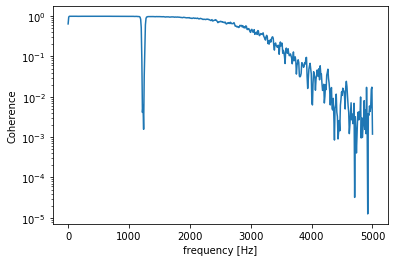

In [121]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

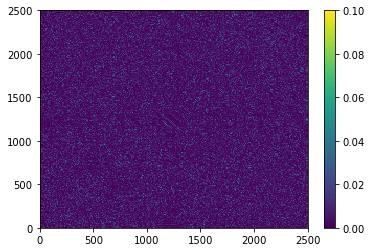

In [145]:
freq, bic, bis = compute_bicoherence(x, x, fs)

# f = plt.figure(figsize = (9, 9))
plt.pcolormesh(freq, freq, bic)
plt.colorbar()
plt.clim(0, 0.1)
plt.show()

In [142]:
bis.shape

(257, 257)